<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CH4" data-toc-modified-id="CH4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CH4</a></span><ul class="toc-item"><li><span><a href="#Log-Normal-Distribution" data-toc-modified-id="Log-Normal-Distribution-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Log Normal Distribution</a></span></li><li><span><a href="#Overthinking:-Matrix-multiplication-in-the-spline-model." data-toc-modified-id="Overthinking:-Matrix-multiplication-in-the-spline-model.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Overthinking: Matrix multiplication in the spline model.</a></span></li><li><span><a href="#apply-vs-lapply-vs-sapply" data-toc-modified-id="apply-vs-lapply-vs-sapply-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>apply vs lapply vs sapply</a></span></li><li><span><a href="#Overthinking:-How-LINK-works" data-toc-modified-id="Overthinking:-How-LINK-works-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><font color="green">Overthinking: How LINK works</font></a></span></li><li><span><a href="#Overthinking:-How-SIM-works" data-toc-modified-id="Overthinking:-How-SIM-works-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><font color="green">Overthinking: How SIM works</font></a></span></li><li><span><a href="#dnorm" data-toc-modified-id="dnorm-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>dnorm</a></span></li><li><span><a href="#VOCAB" data-toc-modified-id="VOCAB-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>VOCAB</a></span></li></ul></li></ul></div>

In [5]:
library(tidyverse)
library(rethinking)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.


Attaching package: 'rstan'


The following object is masked from 'package:tidyr':

    extract


Loading r

# CH4

## Log Normal Distribution

##### Log Normal Probability Density Function (dlnorm Function)

In [8]:
# Specify x-values for dlnorm function
x_dlnorm <- seq(0, 10, by = 0.01)   ; x_dlnorm %>% length()

[1] 1001

In [9]:
y_dlnorm <- dlnorm(x_dlnorm)     # Apply dlnorm function

The previous R code stored the output of the dlnorm function in the data object y_dlnorm. We can now use the plot function to draw a graphic, representing the probability density function (PDF) of the log normal distribution:

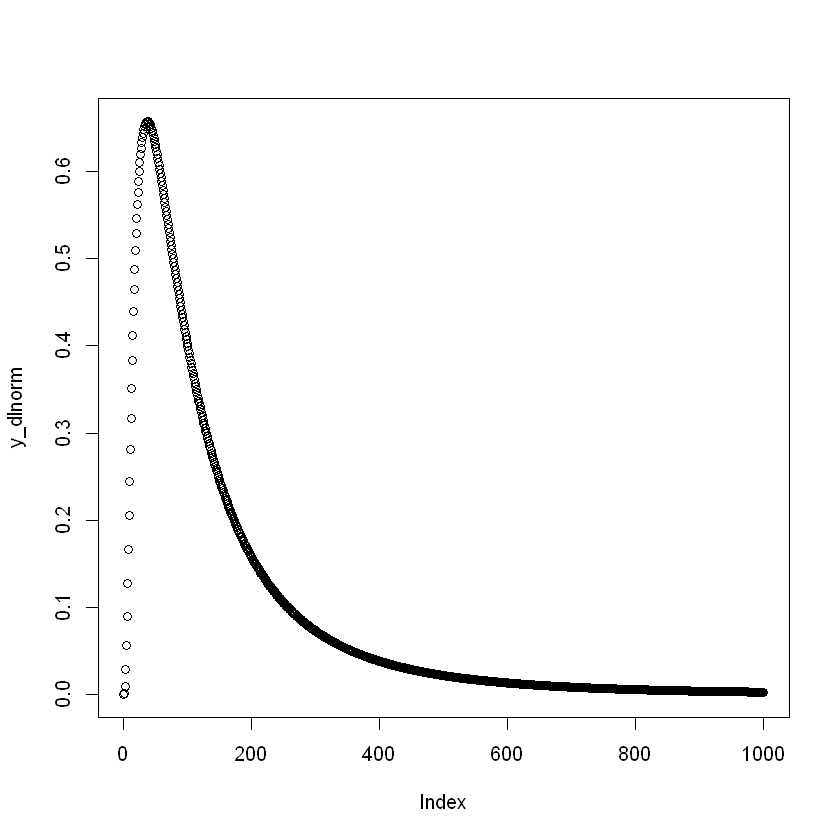

In [10]:
plot(y_dlnorm)  # Plot dlnorm values

## Overthinking: Matrix multiplication in the spline model.

To make model m4.7 easier to program, we used a matrix multiplication of the basis matrix B by the vector of parameters ```w: B %*% w```. 

This notation is just linear algebra shorthand for 

(1) multiplying each element of the vector w by each value in the corresponding column of B and then 

(2) summing up each row of the result. 

You could also fit the same model with the following less-elegant code:

In [111]:
## R code 4.79
m4.7alt <- quap(
    alist(
        T ~ dnorm( mu , sigma ) ,
        mu <- a + sapply( 1:1124 , function(i) sum( B[i,]*w ) ) ,
        a ~ dnorm(6,10),
        w ~ dnorm(0,1),
        sigma ~ dexp(1)
    ),
    data=list( T=d2$temp , B=B ) ,
    start=list( w=rep( 0 , ncol(B) ) ) )

Caution, model may not have converged.

Code 1: Maximum iterations reached.



So you end up with exactly what you need: A sum linear predictor for each year (row). If you haven’t worked with much linear algebra, matrix notation can be intimidating. It is useful to remember that it is nothing more than the mathematics you already know, but expressed in a highly compressed form that is convenient when working with repeated calculations on lists of numbers.

## apply vs lapply vs sapply

he Apply family comprises: apply, lapply , sapply, vapply, mapply, rapply, and tapply. The Family of Apply functions pertains to the R base package, and is populated with functions to manipulate slices of data from matrices, arrays, lists and data frames in a repetitive way. <font color = 'blue'>Apply Function in R are designed to avoid explicit use of loop constructs</font>. They act on an input list, matrix or array, and apply a named function with one or several optional arguments.

http://www.datasciencemadesimple.com/apply-function-r/

###### 1. Apply

Returns a vector or array or list of values obtained by applying a function to margins of an array or matrix. (<font color = 'blue'>used for functions which reduce rows or columns to 1 summary value</font>)

Syntax for Apply function in R:  
```Apply(x,1,sum)```
* Where the first Argument X is a data frame or matrix
* Second argument 1 indicated Processing along rows .if it is 2 then it indicated processing along the columns
* Third Argument is some aggregate function like sum, mean etc or some other user defined functions.

In [2]:
# Example 1: Apply function in R:
# Create data frame:

Age    <- c(56,34,67,33,25,28)
Weight <- c(78,67,56,44,56,89)
Height <- c(165, 171,167,167,166,181)
 
BMI_df <- data.frame(Age,Weight,Height)
BMI_df 

Age,Weight,Height
<dbl>,<dbl>,<dbl>
56,78,165
34,67,171
67,56,167
33,44,167
25,56,166
28,89,181


In [7]:
# row wise sum up of dataframe using apply function in R
apply(BMI_df,1,sum)

# row wise mean of dataframe using apply function in R
apply(BMI_df,1,mean) %>% round(1)

# column wise sum up of dataframe using apply function in R
apply(BMI_df,2,sum)

# column wise mean of dataframe using apply function in R
apply(BMI_df,2,mean)

[1] 299 272 290 244 247 298

[1] 99.7 90.7 96.7 81.3 82.3 99.3

Age Weight Height 
   243    390   1017

Age Weight Height 
  40.5   65.0  169.5

###### 2. lapply

lapply function takes list, vector or Data frame as input and returns only list as output.

In [131]:
lapply(BMI_df, function(BMI_df) BMI_df/2)
       
# the above lapply function divides the values in the dataframe by 2 and the
# output will be in form of list

$Age
[1] 28.0 17.0 33.5 16.5 12.5 14.0

$Weight
[1] 39.0 33.5 28.0 22.0 28.0 44.5

$Height
[1] 82.5 85.5 83.5 83.5 83.0 90.5

In [134]:
# lapply function in R
lapply(BMI_df, mean) %>% str
# the above lapply function applies mean function to the columns
# of the dataframe and the output will be in the form of list  



List of 3
 $ Age   : num 40.5
 $ Weight: num 65
 $ Height: num 170


###### 3. Sapply

In [126]:
# Create toy data frame:

Age    <- c(56,34,67,33,25,28)
Weight <- c(78,67,56,44,56,89)
Height <- c(165, 171,167,167,166,181)
 
BMI_df <- data.frame(Age,Weight,Height)
BMI_df 

Age,Weight,Height
<dbl>,<dbl>,<dbl>
56,78,165
34,67,171
67,56,167
33,44,167
25,56,166
28,89,181


sapply function takes list, vector or Data frame as input. It is similar to lapply function but <font color = 'blue'>returns only vector as output</font>.



In [138]:
# divides the values in the dataframe by 2 and the
# output will be in form of vector
sapply(BMI_df, function(BMI_df) BMI_df/2)       

Age,Weight,Height
28.0,39.0,82.5
17.0,33.5,85.5
33.5,28.0,83.5
16.5,22.0,83.5
12.5,28.0,83.0
14.0,44.5,90.5


In [139]:
# applies mean function to the columns of the dataframe 
# and the output will be in the form of vector  
sapply(BMI_df, mean)

Age Weight Height 
  40.5   65.0  169.5

In [145]:
# applies nchar function and the output will be
random <- c("This", "is","random","vector")
sapply(random, nchar) # nchar -> function that counts characters in a vector

This     is random vector 
     4      2      6      6

##### 4. Mapply

mapply is a multivariate version of sapply. mapply applies FUN to the first elements of each (…) argument, the second elements, the third elements, and so on.

In [2]:
mapply(rep, times = 1:4, x = 4:1)

[[1]]
[1] 4

[[2]]
[1] 3 3

[[3]]
[1] 2 2 2

[[4]]
[1] 1 1 1 1

In [5]:
rep(times = 1, x = 4)
rep(times = 2, x = 3)
rep(times = 3, x = 2)
rep(times = 4, x = 1)

[1] 4

[1] 3 3

[1] 2 2 2

[1] 1 1 1 1

## <font color = 'green'>Overthinking: How LINK works</font>

> <font color = 'green'>What link will do is take your quap approximation, sample from the posterior
distribution, and then compute µ for each case in the data and sample from the posterior
distribution. </font>

The function link is not really very sophisticated. <font color = 'green'>All it is doing is <b>using the formula you provided when you fit the model to compute the value of the linear model. </b>
</font>

It does this for each sample from the posterior distribution, for each case in the data. You could accomplish the same thing for any model, fit by any means, by performing these steps yourself. This is how it’d look for m4.3.

<img src='pics/SR_d36.png' alt='Drawing' style='width:425pt'/>

In [3]:
## R code 4.42 
# load data again, since it's a long way back 
library(rethinking) 
data(Howell1) 
d <- Howell1 
d2 <- d[ d$age >= 18 , ] 
 
# define the average weight, x-bar 
xbar <- mean(d2$weight) 
 
# fit model 
m4.3 <- quap( 
    alist( 
        height ~ dnorm( mu , sigma ) , 
        mu <- a + b*( weight - xbar ) , 
        a ~ dnorm( 178 , 20 ) , 
        b ~ dlnorm( 0 , 1 ) , 
        sigma ~ dunif( 0 , 50 ) 
    ) , 
    data=d2 ) 


In [43]:
# exctract samples from the posterior of parameters
post <- extract.samples(m4.3)

# define linear model
mu.link <- function(weight) post$a + post$b*( weight - xbar )

# define sequence of predictor values (weight)
weight.seq <- seq( from=25 , to=70 , by=1 )

# For each predictor value, for each sample from the posterior
# compute mu: a + b*(weight - bar)
mu <- sapply( weight.seq , mu.link )
# sapply takes the value in the first argument and it passes it 
# into the function in the second argument 

# s means simplified simplified apply it applies the 
# first thing to the second thing and then it simplifies the result
# sapply simplifies the result which apply doesn't


mu.mean <- apply( mu , 2 , mean )
mu.CI <- apply( mu , 2 , PI , prob=0.89 )

In [36]:
mu %>% head(3)

136.5857,137.5034,138.4212,139.3389,140.2566,141.1744,142.0921,143.0098,143.9275,144.8453,...,169.6239,170.5416,171.4594,172.3771,173.2948,174.2125,175.1303,176.0480,176.9657,177.8834
136.6198,137.5273,138.4348,139.3423,140.2497,141.1572,142.0647,142.9722,143.8796,144.7871,...,169.2889,170.1964,171.1039,172.0113,172.9188,173.8263,174.7338,175.6412,176.5487,177.4562
135.7582,136.7126,137.6670,138.6215,139.5759,140.5303,141.4847,142.4392,143.3936,144.3480,...,170.1175,171.0719,172.0264,172.9808,173.9352,174.8896,175.8441,176.7985,177.7529,178.7073


In [41]:
# purrr can't get this to work...how do you return a 46*10000 matrix of doubles?

# exctract samples from the posterior of parameters
post <- extract.samples(m4.3)

# define linear model
mu.link <- function(weight) post$a + post$b*( weight - xbar )

# define sequence of predictor values (weight)
weight.seq <- seq( from=25 , to=70 , by=1 )

# For each predictor value, for each sample from the posterior
# compute mu: a + b*(weight - bar)
mu <- purrr::map( weight.seq , mu.link )
# sapply takes the value in the first argument and it passes it 
# into the function in the second argument 

# s means simplified simplified apply it applies the 
# first thing to the second thing and then it simplifies the result
# sapply simplifies the result which apply doesn't


mu.mean <- apply( mu , 2 , mean )
mu.CI <- apply( mu , 2 , PI , prob=0.89 )

ERROR: Error in apply(mu, 2, mean): dim(X) must have a positive length


In [27]:
link

new("standardGeneric", .Data = function (fit, data, n = 1000, 
    ...) 
standardGeneric("link"), generic = "link", package = "rethinking", 
    group = list(), valueClass = character(0), signature = c("fit", 
    "data", "n"), default = new("derivedDefaultMethod", .Data = function (fit, 
        data, n = 1000, ...) 
    {
        print(class(fit))
    }, target = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), defined = new("signature", .Data = "ANY", 
        names = "fit", package = "methods"), generic = "link"), 
    skeleton = (new("derivedDefaultMethod", .Data = function (fit, 
        data, n = 1000, ...) 
    {
        print(class(fit))
    }, target = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), defined = new("signature", .Data = "ANY", 
        names = "fit", package = "methods"), generic = "link"))(fit, 
        data, n, ...))
<bytecode: 0x000000001f9d3eb0>
<environment: 0x000000001f8b6c18>
attr(,"generic")
[1] "link"
attr(,"generic")attr(,"package")
[1] "rethinking"
attr(,"package")
[1] "rethinking"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "fit"  "data" "n"   
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (fit, data, n = 1000, ...) 
{
    print(class(fit))
}
<environment: namespace:rethinking>

Signatures:
        fit  
target  "ANY"
defined "ANY"
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (fit, data, n = 1000, 
    ...) 
{
    print(class(fit))
}, target = new("signature", .Data = "ANY", names = "fit", package = "methods"), 
    defined = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), generic = "link"))(fit, data, n, 
    ...)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

<font color = 'lightgrey'>And the values in mu.mean and mu.CI should be very similar (allowing for simulation variance) to what you got the automated way, using link. </font>

Knowing this manual method is useful both for 

(1) understanding and 

(2) sheer power. 

Whatever the model you find yourself with, this approach can be used to generate posterior predictions for any component of it.

Automated tools like link save effort, but they are never as flexible as the code you can write yourself.

In [5]:
# alternate functional form
post <- extract.samples(m4.3)
mu.link <- function(weight) {
    post$a + post$b*( weight - xbar ) # xbar <- mean(d2$weight)
}
weight.seq <- seq( from=25 , to=70 , by=1 )
mu <- sapply( weight.seq , mu.link )
mu.mean <- apply( mu , 2 , mean )
mu.CI <- apply( mu , 2 , PI , prob=0.89 )

In [6]:
mu.CI %>% head

5%,135.1500,136.1138,137.0815,138.0484,139.0146,139.9788,140.9433,141.9064,142.8690,143.8311,...,167.9160,168.7587,169.6010,170.4413,171.2819,172.1177,172.9596,173.7982,174.6336,175.4741
94%,137.9373,138.7741,139.6149,140.4535,141.2942,142.1359,142.9820,143.8205,144.6648,145.5177,...,170.2084,171.1655,172.1326,173.0964,174.0670,175.0326,175.9990,176.9616,177.9308,178.8975


In [23]:
mu.link <- function(weight) post$a + post$b*( weight - xbar )

mu.link %>% str

function (weight)  
 - attr(*, "srcref")= 'srcref' int [1:8] 1 12 1 61 12 61 1 1
  ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x0000000032ea59e0> 


## <font color = 'green'>Overthinking: How SIM works</font>

**Overthinking**: Rolling your own sim. 

For every distribution like <b>dnorm</b>, there is a <b>companion simulation function</b>. 

> <font color = 'green'>For the <b>Gaussian</b> distribution, the <b>companion is rnorm</b>, and it <b>(link) simulates sampling from a Gaussian distribution</b></font>. 

> What we want R to do is simulate a height for each set of samples, and to do this for each value of weight. 

The following will do it:

R code 4.63

In [62]:
# SIM under the hood
post <- extract.samples(m4.3) 
weight.seq <- 25:70
sim.height <- sapply( weight.seq , function(weight)
    rnorm(
        n=nrow(post) ,
        mean=post$a + post$b*( weight - xbar ) ,
        sd=post$sigma ) )
height.PI <- apply( sim.height , 2 , PI , prob=0.89 )

ERROR: Error in extract.samples(m4.3): object 'm4.3' not found


The values in height.PI will be practically identical to the ones computed in the main text and
displayed in Figure 4.8.

## dnorm

rnorm is the R function that simulates random variates having a specified normal distribution. As with pnorm , qnorm , and dnorm , optional arguments specify the mean and standard deviation of the distribution.

<font color = 'lightgrey'>dnorm gives the density, pnorm gives the distribution function, qnorm gives the quantile function, and rnorm generates random deviates.</font>

<font color = 'lightgrey'>These functions provide information about the uniform distribution on the interval from min to max.  dunif gives the density, punif gives the distribution function qunif gives the quantile function and runif generates random deviates.</font>

[1] TRUE

[1] TRUE

[1] TRUE

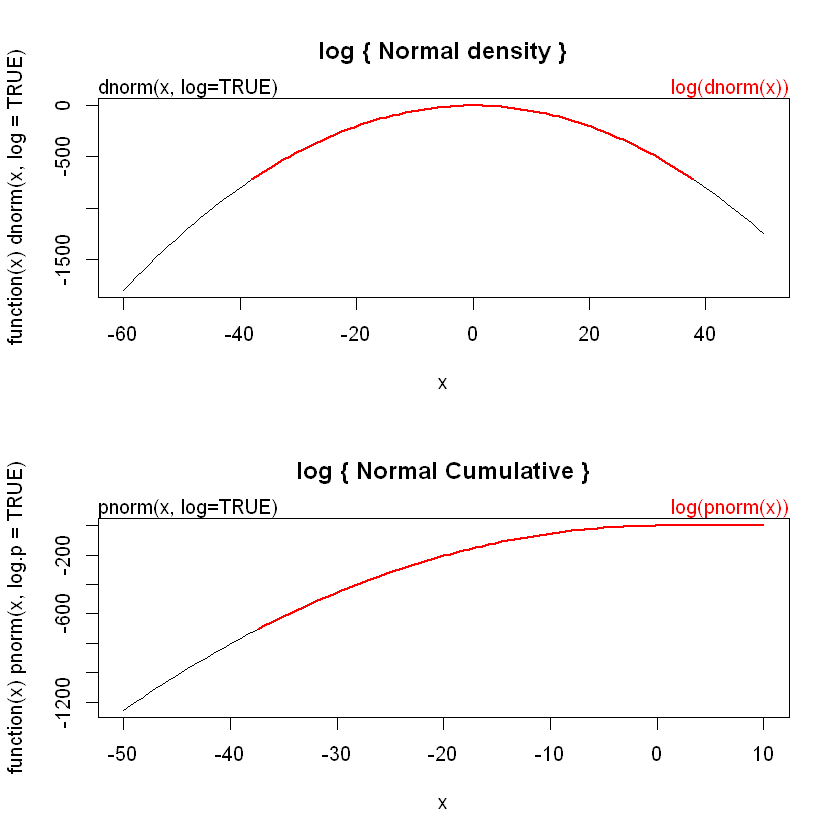

In [41]:
require(graphics)

dnorm(0) == 1/sqrt(2*pi)
dnorm(1) == exp(-1/2)/sqrt(2*pi)
dnorm(1) == 1/sqrt(2*pi*exp(1))

## Using "log = TRUE" for an extended range :
par(mfrow = c(2,1))
plot(function(x) dnorm(x, log = TRUE), -60, 50,
     main = "log { Normal density }")
curve(log(dnorm(x)), add = TRUE, col = "red", lwd = 2)
mtext("dnorm(x, log=TRUE)", adj = 0)
mtext("log(dnorm(x))", col = "red", adj = 1)

plot(function(x) pnorm(x, log.p = TRUE), -50, 10,
     main = "log { Normal Cumulative }")
curve(log(pnorm(x)), add = TRUE, col = "red", lwd = 2)
mtext("pnorm(x, log=TRUE)", adj = 0)
mtext("log(pnorm(x))", col = "red", adj = 1)

## VOCAB

In statistics, a <span style='background-color: lightyellow'>**power law**</span> is a functional relationship between two quantities, where a relative change in one quantity results in a proportional relative change in the other quantity, independent of the initial size of those quantities: one quantity varies as a power of another.

**quadratic approximation**. Under quite general conditions, the region near the peak of the posterior distribution will be nearly Gaussian—or “normal”—in shape. This means the posterior distribution can be usefully approximated by a Gaussian distribution. A Gaussian distribution is convenient, because it can be completely described by only two numbers: the location of its center (mean) and its spread (variance). 

* A Gaussian approximation is called “quadratic approximation” because the logarithm of a Gaussian distribution forms a parabola. And a parabola is a quadratic function. So this approximation essentially represents any log-posterior with a parabola.